In [1]:
# Use google word2Vec trained model and gensim
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

/home/edgar/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
# find most similar word
model.most_similar(positive=['espresso'])

[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686208844184875),
 ('coffee', 0.6616826057434082),
 ('latte', 0.6536753177642822),
 ('caramel_macchiato', 0.6491268873214722),
 ('ristretto', 0.6485545635223389),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('chai_latte', 0.6308028697967529),
 ('espresso_cappuccino', 0.6280542612075806)]

In [3]:
# Word2Vec Math
# A is to B as C is to X:

# check gensim documentation for this
# functions details
# extremely impressive
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a,b,c = map(lambda x:x if type(x) == list else [x], (a,b,c))
    res = model.most_similar(positive=b+c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

In [4]:
A_is_to_B_as_C_is_to('man', 'woman', 'king')

'queen'

In [5]:
# For finding countries' capitals 
# using relative values
for country in "Italy","France", "India", "China":    
    print("{} is the capital of {}".format(A_is_to_B_as_C_is_to("Germany", "Berlin", country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [6]:
for company in "Google", "IBM", "Boeing", "Microsoft", "Samsung":
    products = A_is_to_B_as_C_is_to(
        ["Starbucks", "Apple"], 
        ["Starbucks_coffee", "iPhone"],
        company,
        topn=3
    )
    
    print("{} -> {}".format(company, ', '.join(products)))

Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###


In [7]:
# Visualizing word embedding
import numpy as np

# t-distributed Stochastic Neighbor Embedding.
from sklearn.manifold import TSNE

# support vector classifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

# import the random library
import random

# plotting
import matplotlib.pyplot as plt

import csv



# geopandas for geography and maps
import geopandas as gpd

beverages = ["espresso", "beer", "vodka", "wine", "cola", "tea", "cappuccino"]
countries = ["Italy", "Germany", "Russia", "France", "USA", "India", "Paraguay"]
sports = ["soccer", "handball", "hockey", "cycling", "basketball", "cricket", "volleyball"]

items = beverages + countries + sports

item_vectors = [(item, model[item]) for item in items if item in model]

In [8]:
print("{} is a vector of {} nodes".format(items[0], model[items[0]].shape[0]))

espresso is a vector of 300 nodes


In [9]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths= np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T

# t-distributed Stochastic Neighbor Embedding.
# to reduce high dimensional space onto a plane
tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)



[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 0.542792
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 64.1150436, gradient norm = 0.2463353 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 55.7065506, gradient norm = 0.1410016 (50 iterations in 0.007s)
[t-SNE] Iteration 150: error = 68.5314407, gradient norm = 0.2030461 (50 iterations in 0.006s)
[t-SNE] Iteration 200: error = 70.3311005, gradient norm = 0.7353825 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 83.3099899, gradient norm = 0.5482106 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.309990
[t-SNE] Iteration 300: error = 1.2132577, gradient norm = 0.0011223 (50 iterations in 0.006s)
[t-SNE] Iteration 350: error = 0.9512645, gradient norm = 0.0005796 (50 i

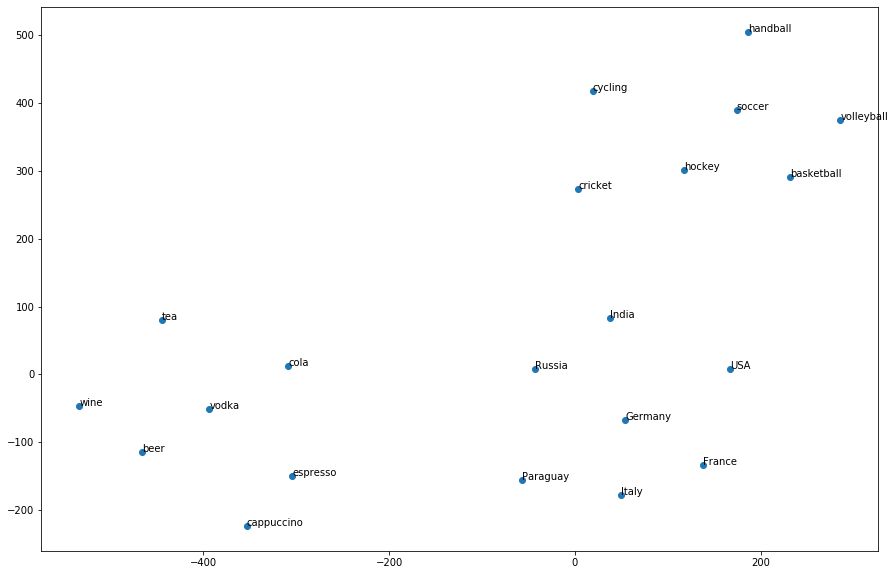

In [10]:
x=tsne[:,0]
y=tsne[:, 1]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1))
    
plt.show()

In [11]:
# find subspaces with entities of one class (type)
model.most_similar(positive=["Germany"])



[('Austria', 0.7461062073707581),
 ('German', 0.7178748846054077),
 ('Germans', 0.6628648042678833),
 ('Switzerland', 0.6506868600845337),
 ('Hungary', 0.6504982709884644),
 ('Germnay', 0.649348258972168),
 ('Netherlands', 0.6437496542930603),
 ('Cologne', 0.6430779695510864),
 ('symbol_RSTI', 0.6389946937561035),
 ('Annita_Kirsten', 0.6342948079109192)]

In [12]:
# positive examples of countries
positive = [
    "Chile",
    "Mauritius","Barbados", "Ukraine", "Israel", "Rwanda", "Venezuela", "Lithuania", 
    "Costa_Rica", "Romania", "Senegal", "Canada", "Malasia", "South_Korea", "Australia", "Tunisia", "Armenia",
    "China", "Czech_Republic", "Guinea", "Gambia", "Gabon", "Italy", "Montenegro", "Guyana", "Nicaragua", "French_Guiana",
    "Serbia", "Uruguay", "Ethiopia", "Samoa", "Antarctica", "Suriname", "Finland", "Bermuda", "Cuba", "Oman", "Azerbaijan",
    "Papua", "France", "Tanzania", "Germany"
]


In [13]:
# negative examples
negative = random.sample(model.vocab.keys(), 5000)
negative[:4]
len(negative)

5000

In [14]:
# creating labells for negative examples
labelled = [(p, 1) for p in positive] + [(n, 0) for n in negative]
random.shuffle(labelled)
X = np.asarray([model[w] for w, l in labelled])
y = np.asarray([l for w, l in labelled])

In [15]:
# Training support vector machine to create a separation line for stuff

# 70% of the data
TRAINING_FRACTION = 0.7
cut_off = int(TRAINING_FRACTION * len(labelled))
clf = svm.SVC(kernel='linear')
clf.fit(X[:cut_off], y[:cut_off])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
res = clf.predict(X[cut_off:])

x_testing = X[cut_off:]
y_testing = y[cut_off:]


# pretty high accuracy
accuracy_score(y_testing, res)

0.9993390614672836

In [17]:
res = clf.predict(X[cut_off:])

missed = [country for (pred, truth, country) in 
 zip(res, y[cut_off:], labelled[cut_off:]) if pred != truth]

100 - 100 * float(len(missed)) / len(res), missed

(99.93390614672836, [('French_Guiana', 1)])

In [18]:
# pretty high f1 score
f1_score(y_testing, res, average='macro') 

0.9780943693987172

In [19]:
all_predictions = clf.predict(model.syn0)

/home/edgar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [20]:
res = []
for word, pred in zip(model.index2word, all_predictions):
    if pred:
        res.append(word)
        if len(res) == 150:
            break
random.sample(res, 10)

['Israel',
 'Kosovo',
 'Saudi_Arabia',
 'Cyprus',
 'Belarus',
 'countries',
 'Bahrain',
 'Thailand',
 'Uganda',
 'Bahamas']

In [21]:
# Find the most relevant item from a classa of a given criterion

# country_to_idx = {country['name']}
countries = list(csv.DictReader(open('countries.csv')))
countries[:10]

[OrderedDict([('name', 'Canada'), ('cc', 'ca'), ('cc3', 'can')]),
 OrderedDict([('name', 'Turkmenistan'), ('cc', 'tm'), ('cc3', 'tkm')]),
 OrderedDict([('name', 'Ethiopia'), ('cc', 'et'), ('cc3', 'eth')]),
 OrderedDict([('name', 'Swaziland'), ('cc', 'sz'), ('cc3', 'swz')]),
 OrderedDict([('name', 'Czech_Republic'), ('cc', 'cz'), ('cc3', 'cze')]),
 OrderedDict([('name', 'Cameroon'), ('cc', 'cm'), ('cc3', 'cmr')]),
 OrderedDict([('name', 'UAE'), ('cc', 'ae'), ('cc3', 'are')]),
 OrderedDict([('name', 'Liberia'), ('cc', 'lr'), ('cc3', 'lbr')]),
 OrderedDict([('name', 'Netherlands'), ('cc', 'nl'), ('cc3', 'nld')]),
 OrderedDict([('name', 'East_Timor'), ('cc', 'tl'), ('cc3', 'tls')])]

In [22]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])
country_vecs.shape

(184, 300)

In [23]:

# which countries are more like canada

dists = np.dot(country_vecs, country_vecs[country_to_idx['Canada']])
for idx in reversed(np.argsort(dists)[-10:]):
    print(countries[idx]['name'], dists[idx])

Canada 7.544024
New_Zealand 3.9619699
Finland 3.9392405
Puerto_Rico 3.838145
Jamaica 3.8102937
Sweden 3.8042789
Slovakia 3.7038739
Australia 3.671101
Bahamas 3.6240416
United_States 3.537434


In [24]:
def rank_countries(term, topn=10, field='name'):
    print(term)
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx]))
        for idx in reversed(np.argsort(dists)[-topn:])]

In [25]:
# pretty cool trick!!
rank_countries('cricket')

cricket


[('Sri_Lanka', 5.92276668548584),
 ('Zimbabwe', 5.336524963378906),
 ('Bangladesh', 5.192488670349121),
 ('Pakistan', 4.948408126831055),
 ('Guyana', 3.9162840843200684),
 ('Barbados', 3.757995128631592),
 ('India', 3.7504398822784424),
 ('South_Africa', 3.6561501026153564),
 ('New_Zealand', 3.64202880859375),
 ('Fiji', 3.608567714691162)]

In [26]:
# Visuallzing country on a Map
# visualize country rankings from an experiment on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


coffee


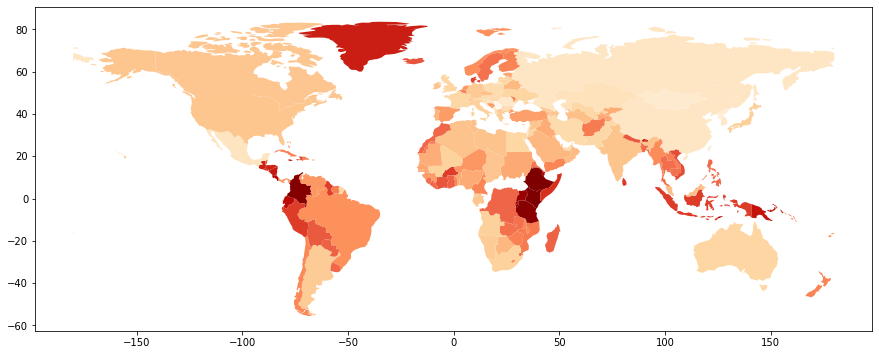

In [27]:
def map_term(term):
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd', figsize=(15, 12))
map_term('coffee')
    

In [30]:
for country in rank_countries('coffee'):
    print(country)

coffee
('Ethiopia', 1.9432250261306763)
('Kenya', 1.9391343593597412)
('Colombia', 1.9116393327713013)
('Burundi', 1.885450839996338)
('Tanzania', 1.883944034576416)
('Uganda', 1.7865114212036133)
('East_Timor', 1.7661278247833252)
('Rwanda', 1.7186616659164429)
('Djibouti', 1.670926570892334)
('Costa_Rica', 1.6578598022460938)


In [12]:
# CHAPTER 6
# Question Matching
# getting the dataset form internet archive org
# stack exchange travel questions

import os
import pandas as pd


filename = "travel_stackexchange/Posts.xml"

In [8]:
def extact_stackexchange(filename, limit=1000000):
    rows = []
    file = open(filename, "r")
    posts = file.readlines()
    file.close()
    for i in range(len(posts)):
        line = str(posts[i])       
        if not line.startswith("  <row "):
             continue
        if i % 1000 == 0:
            print('\r%05d/%05d' % (i, limit), end='', flush=True)
        parts = line[6:-5].split('"')
        record = {}
        for i in range(0, len(parts), 2):
            k = parts[i].replace('=', '').strip()
            v = parts[i+1].strip()
            record[k] = v
        rows.append(record)
        if len(rows) > limit:
            break 
    return rows

In [9]:
rows = extact_stackexchange(filename)

102000/1000000

In [32]:
# convert list of dictionaries to Pandas Dataframe
df = pd.DataFrame.from_records(rows)
df = df.set_index("Id", drop=False)
df["Title"] = df["Title"].fillna('').astype('str')
df['Tags'] = df["Tags"].fillna('').astype('str')
df['Body'] = df["Body"].fillna('').astype('str')
df['Id'] = df['Id'].astype('int')
df['PostTypeId'] = df['PostTypeId'].astype('int')
df['ViewCount'] = df['ViewCount'].fillna(0).astype('int')

In [44]:
# view popular questions
for question in list(df[df['ViewCount'] > 250000]['Title']):
    print(question)

Do I need a US visa to transit (or layover) through an American airport?
How much electronics and other valuables can I bring duty-free when going to India?
How to get from Nice to Monaco by public transport?
Should my first trip be to the country which issued my Schengen Visa?
Can I cross the USA-Canada border with a birth certificate and a passport locator number?
What's the difference between 'Redress Number' and 'Known Traveler Number'? Do I need both for TSA PreCheck?
Can I use Google Maps traffic information to estimate driving time for a specific date/time?
Is there a way to find out if I need a transit visa for a layover in the UK?
Are aerosol cans allowed and safe, in checked luggage?
How to track my UK Visa Application Status?
When applying for an Indian Passport, how do I know if I'm in the ECR or non-ECR category?
Are battery packs allowed in hand luggage?


In [46]:
from keras.preprocessing.text import Tokenizer

In [48]:
VOCAB_SIZE = 50000
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df['Body']+" "+df["Title"])

In [49]:
df["title_tokens"] = tokenizer.texts_to_sequences(df['Title'])
df["body_tokens"] = tokenizer.texts_to_sequences(df['Body'])

In [56]:
df["body_tokens"].head()

Id
1    [2, 4, 1, 35, 9525, 9, 12, 20, 404, 15, 6, 176...
2    [2, 4, 1, 32, 59, 56, 13, 326, 2604, 120, 36, ...
3    [2, 4, 1, 56, 111, 55, 19, 7, 88, 110, 42, 334...
4    [2, 4, 1, 734, 179, 79, 42, 70, 300, 305, 72, ...
5    [2, 4, 1, 191, 2604, 170, 16, 1114, 92, 59, 68...
Name: body_tokens, dtype: object

In [57]:
df["Body"].head()

Id
1    &lt;p&gt;My fiancée and I are looking for a go...
2    &lt;p&gt;This was one of our definition questi...
3    &lt;p&gt;One way would be to go through an Adv...
4    &lt;p&gt;Singapore Airlines has an all-busines...
5    &lt;p&gt;Another definition question that inte...
Name: Body, dtype: object

In [1]:
# SUGGESTING EMOJIS
# BUILDING A SIMPLE SENTIMENT CLASSIFIER

import pandas as pd
from keras.utils.data_utils import get_file
# import nb_utils


emotions_source = "https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv"
emotion_csv = get_file('text_emotion.csv', emotions_source)

Using TensorFlow backend.


In [2]:
emotion_df = pd.read_csv(emotion_csv)
emotion_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [3]:
emotion_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse.csc import csc_matrix

In [15]:
VOCAB_SIZE = 50000

# create a vectorize
tfidf_vec = TfidfVectorizer(max_features=VOCAB_SIZE)
label_encoder = LabelEncoder()

X = tfidf_vec.fit_transform(emotion_df['content'])
y = label_encoder.fit_transform(emotion_df['sentiment'])

In [16]:
emotion_df['content'][0]

'@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['

In [17]:
emotion_df['sentiment'][0]

'empty'

In [18]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
bayes = MultinomialNB()
bayes.fit(X, y)
pred = bayes.predict(X)
precision_score(pred, y, average='micro')

0.433475

In [20]:
str(bayes.score(X, y)*100)[:5]+"% precision"

'43.34% precision'

In [22]:
classifiers = {
    "sgd": SGDClassifier(loss='hinge'),
    "svm": SVC(),
    "random_forrest": RandomForestClassifier()
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
for lbl, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(lbl, precision_score(predictions, y_test, average='micro'))

sgd 0.3278030303030303


/home/edgar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm 0.21863636363636363


/home/edgar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random_forrest 0.27954545454545454


In [94]:
# use CNN for text classification

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

GLOVE_DIR = "glove.6B/"
TEXT_DATA_DIR =  "20_newsgroup/"
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2




In [74]:
texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                if sys.version_info < (3,):
                    f = open(fpath)
                else:
                    f = open(fpath, encoding='latin-1')
                t = f.read()
                i = t.find('\n\n')  # skip header
                if 0 < i:
                    t = t[i:]
                texts.append(t)
                f.close()
                labels.append(label_id)

print('Found %s texts.' % len(texts))




Found 19997 texts.


In [75]:

# tokenize text into sequences
# of indexes
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [92]:
labels_index

{'alt.atheism': 0,
 'comp.graphics': 1,
 'comp.os.ms-windows.misc': 2,
 'comp.sys.ibm.pc.hardware': 3,
 'comp.sys.mac.hardware': 4,
 'comp.windows.x': 5,
 'misc.forsale': 6,
 'rec.autos': 7,
 'rec.motorcycles': 8,
 'rec.sport.baseball': 9,
 'rec.sport.hockey': 10,
 'sci.crypt': 11,
 'sci.electronics': 12,
 'sci.med': 13,
 'sci.space': 14,
 'soc.religion.christian': 15,
 'talk.politics.guns': 16,
 'talk.politics.mideast': 17,
 'talk.politics.misc': 18,
 'talk.religion.misc': 19}

In [76]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 174074 unique tokens.


In [77]:
# pad sequences makes all sequences have the same
# length or size to be consistent
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [78]:
labels = to_categorical(np.asarray(labels))

In [79]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (19997, 1000)
Shape of label tensor: (19997, 20)


In [80]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [81]:
# getting word vectors
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [82]:
# Displaying some word vectors
n = 0
for w, v in embeddings_index.items():
    if n > 3:
        break
    print(w, v)
    print("\n")
    n = n+1

the [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.270

In [83]:
n = 0
for w, v in word_index.items():
    if n > 10:
        break
    print( "{}: {}".format(w, v) )
    print("\n")
    n = n+1

the: 1


to: 2


of: 3


a: 4


and: 5


in: 6


i: 7


is: 8


that: 9


'ax: 10


it: 11




In [84]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [85]:
word_index['the']

1

In [86]:
# embedding matrix resuting from
# mapping the word_index with the embeddings_index
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [87]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [88]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [96]:
print('Training model.')
print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_val, y_val))

Training model.
Training model.
Train on 15998 samples, validate on 3999 samples
Epoch 1/10
15998/15998 [==============================] - 36s 2ms/step - loss: 2.4471 - acc: 0.2065 - val_loss: 1.8419 - val_acc: 0.3273
Epoch 2/10
15998/15998 [==============================] - 40s 2ms/step - loss: 1.5736 - acc: 0.4484 - val_loss: 1.4043 - val_acc: 0.4779
Epoch 3/10
15998/15998 [==============================] - 39s 2ms/step - loss: 1.2141 - acc: 0.5790 - val_loss: 1.2270 - val_acc: 0.6007
Epoch 4/10
15998/15998 [==============================] - 40s 3ms/step - loss: 1.0005 - acc: 0.6615 - val_loss: 1.1289 - val_acc: 0.6289
Epoch 5/10
15998/15998 [==============================] - 39s 2ms/step - loss: 0.8533 - acc: 0.7107 - val_loss: 0.9303 - val_acc: 0.6917
Epoch 6/10
15998/15998 [==============================] - 38s 2ms/step - loss: 0.7229 - acc: 0.7546 - val_loss: 0.9501 - val_acc: 0.6884
Epoch 7/10
15998/15998 [==============================] - 39s 2ms/step - loss: 0.6197 - acc: 0.78

In [ ]:


# Use RNN for text Classification



# Use Word2vect or Doc2Vect for text classification
